# Google Play Store (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading the Dataset

In [2]:
# Load the dataset
dataset_path = "/content/drive/MyDrive/Work/Projects/googleplaystore.csv"
data = pd.read_csv(dataset_path)

In [3]:
# Display the first few rows of the dataset
print(data.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [4]:
print(data.shape)

(10841, 13)


In [5]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [7]:
# Summary statistics
print(data.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


# Checking Missing Values

In [8]:
# Check for missing values
print(data.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [9]:
# Convert the 'Reviews' column to string type before using .str accessor
data['Reviews'] = data['Reviews'].astype(str)
data[~data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
data=data.drop(data.index[10472])

In [11]:
# Convert 'Reviews' to numeric, handling errors
data["Reviews"] = pd.to_numeric(data["Reviews"], errors='coerce')

# Convert 'Reviews' to integers (NaN will remain)
data["Reviews"] = data["Reviews"].astype('Int64')

In [12]:
data.describe()

,Rating,Reviews
count,9366.000000,10840.0
mean,4.191757,444152.896033
std,0.515219,2927760.603886
min,1.000000,0.0
25%,4.000000,38.0
50%,4.300000,2094.0
75%,4.500000,54775.5
max,5.000000,78158306.0


# Cleaning of Data

In [13]:
def impute_median(series):
    return series.fillna(series.median())

data['Rating'] = data['Rating'].transform(impute_median)

In [14]:
data['Current Ver'].mode()
data.loc[data['Current Ver'] == 'PRT', 'Current Ver'].count()
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace=True)

In [15]:
data['Android Ver'].mode()
data.loc[data['Android Ver'] == 'Varies with device', 'Android Ver'].count()
data['Android Ver'].fillna(data['Android Ver'].mode()[0], inplace=True)

In [16]:
data['Type'].mode()
data.loc[data['Type'] == '0', 'Type'].count()
data['Type'].fillna(data['Type'].mode()[0], inplace=True)

In [17]:
data['Content Rating'].mode()
data.loc[data['Content Rating'] == 'Unrated', 'Content Rating'].count()
data['Content Rating'].fillna(data['Content Rating'].mode()[0], inplace=True)

In [18]:
# Check for missing values
print(data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


# Exploratory Data Analysis

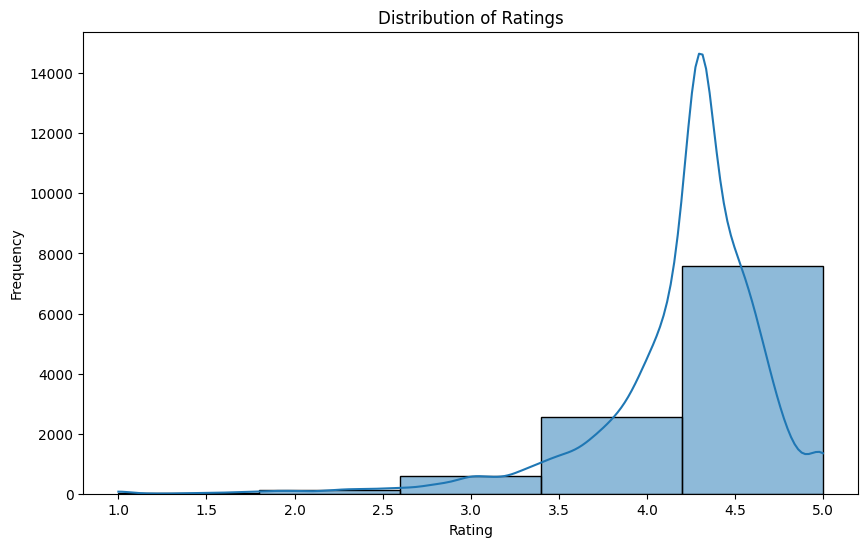

In [19]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

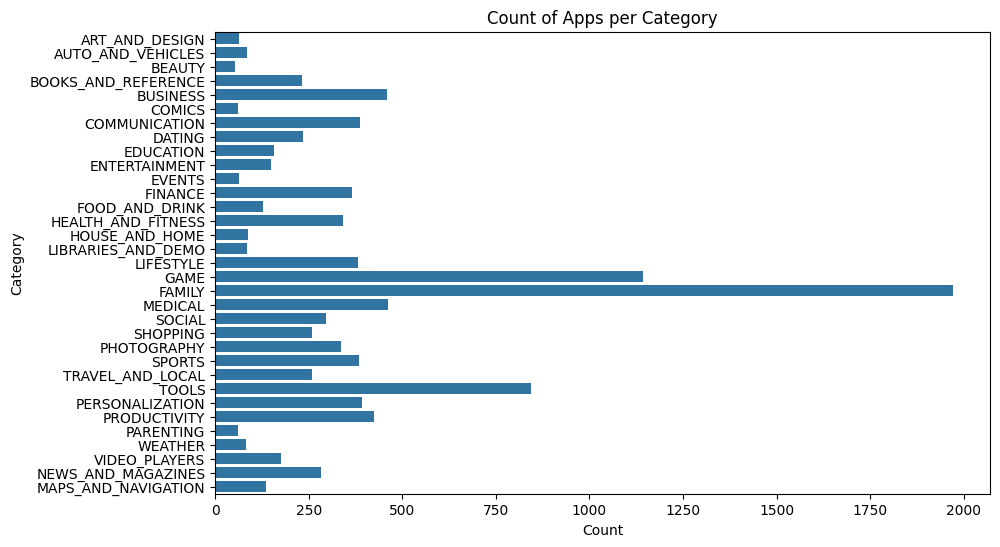

In [20]:
# Count of Apps per Category
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Category'])
plt.title('Count of Apps per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

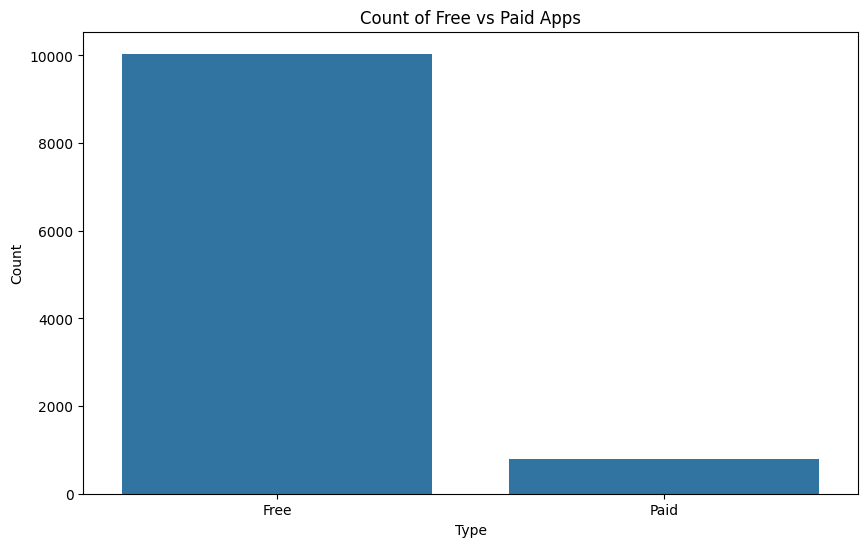

In [21]:
# Free vs Paid Apps
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Type'])
plt.title('Count of Free vs Paid Apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

<ipython-input-22-eaaaf1631ba0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Category', data=data, ci=None)


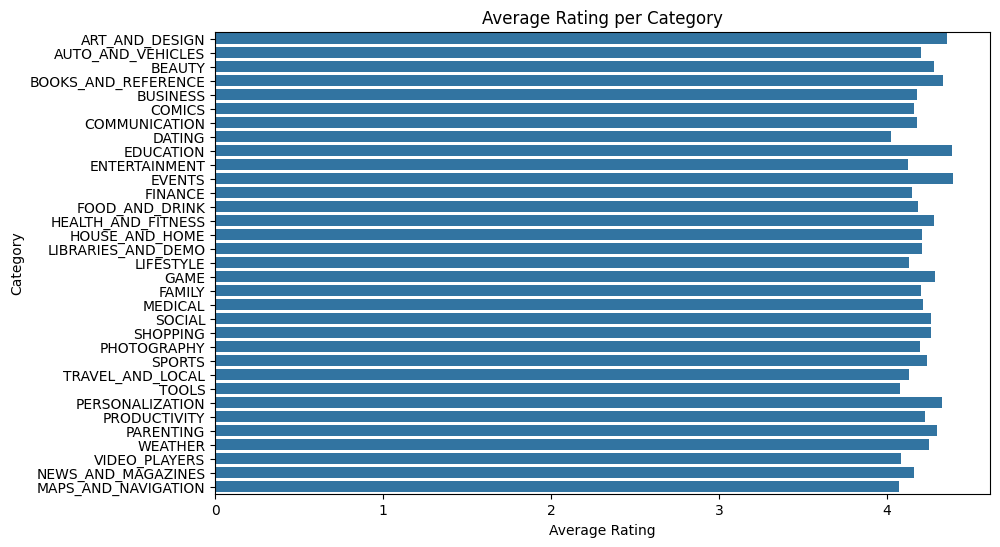

In [22]:
#Average Rating per Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Category', data=data, ci=None)
plt.title('Average Rating per Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

<ipython-input-23-ca42c3ce6853>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Reviews', y='Category', data=data, ci=None)


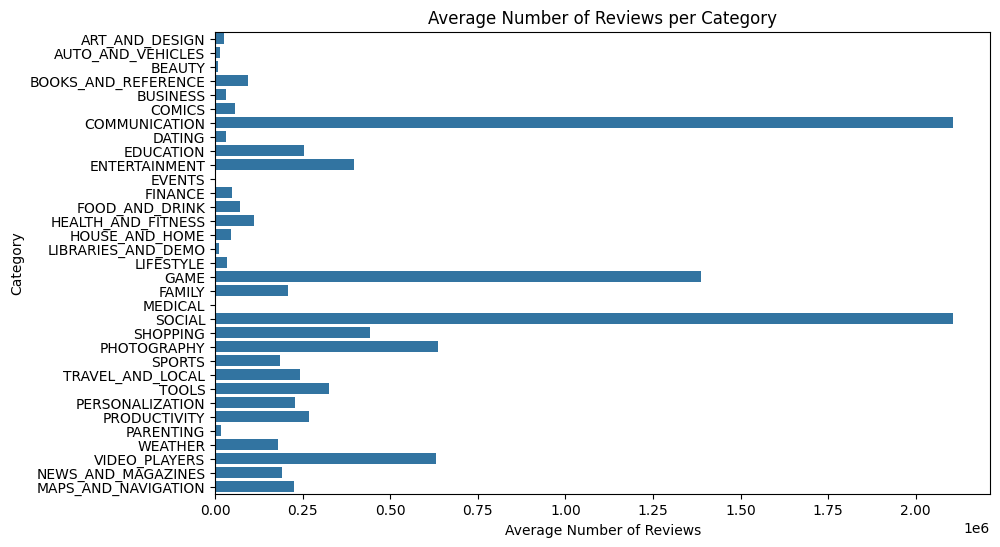

In [23]:
# Average Number of Reviews per Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='Category', data=data, ci=None)
plt.title('Average Number of Reviews per Category')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Category')
plt.show()

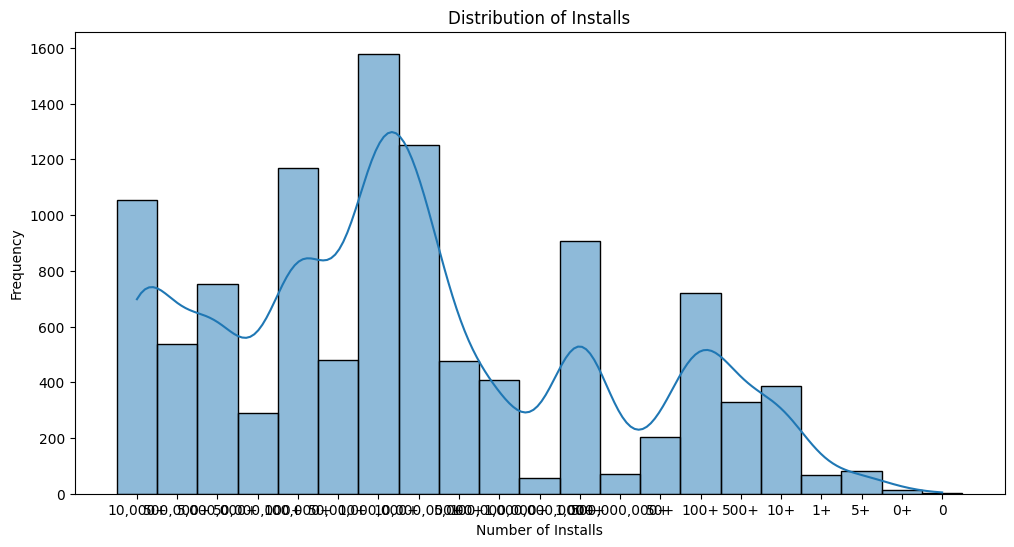

In [24]:
# Distribution of Installs
plt.figure(figsize=(12, 6))
sns.histplot(data['Installs'], bins=5, kde=True)
plt.title('Distribution of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()

<ipython-input-25-b48a1a4ebbda>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Reviews', y='Category', data=data, ci=None, estimator=np.mean, order=data.groupby('Category')['Reviews'].mean().sort_values().index)


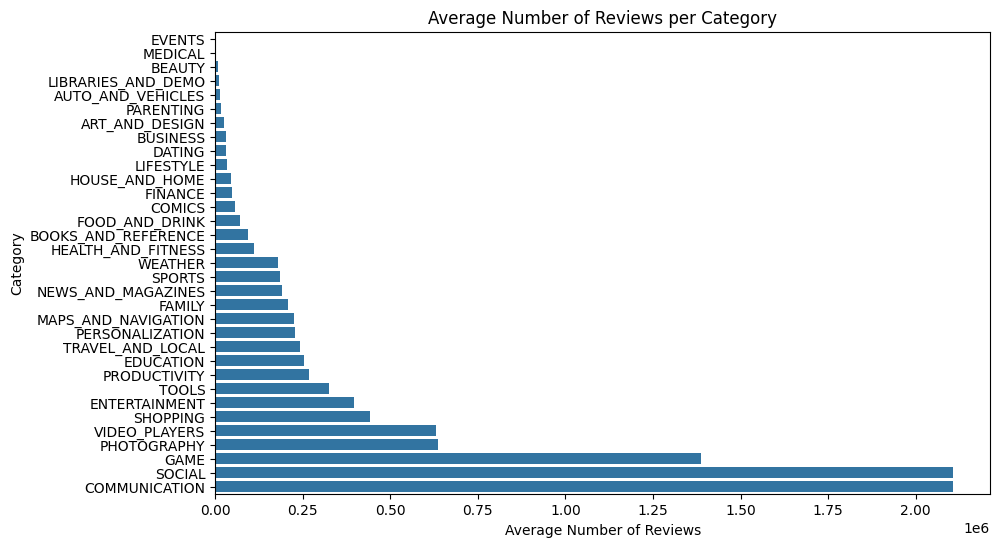

In [25]:
# 6. Average Number of Reviews per Category
plt.figure(figsize=(10, 6))

# Convert 'Reviews' column to numeric, handling errors
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

sns.barplot(x='Reviews', y='Category', data=data, ci=None, estimator=np.mean, order=data.groupby('Category')['Reviews'].mean().sort_values().index)
plt.title('Average Number of Reviews per Category')
plt.xlabel('Average Number of Reviews')
plt.ylabel('Category')
plt.show()

<ipython-input-56-924f2ca63e4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category',data=data, palette='bright')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

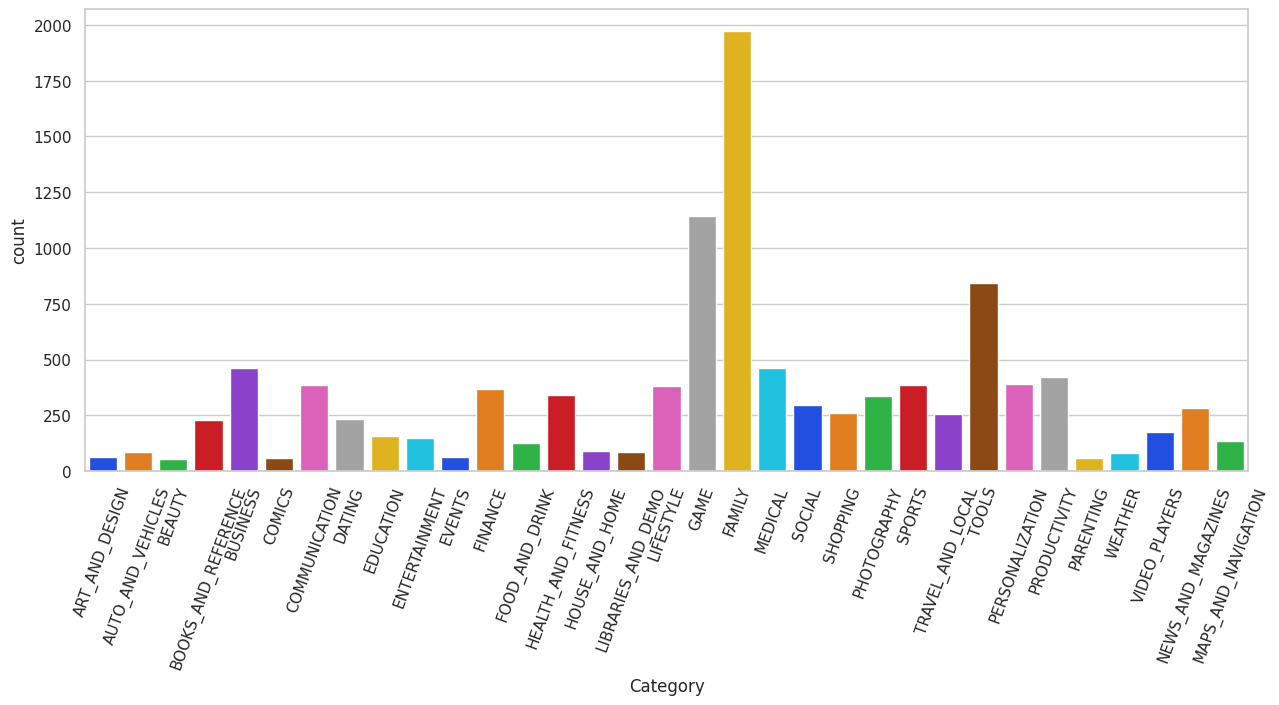

In [56]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(x='Category',data=data, palette='bright')
plt.xticks(rotation=70)

<ipython-input-61-aa4be199a1da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Rating',x='Category',data = data.sort_values('Rating',ascending=False), palette='Set1')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'BUSINESS'),
  Text(1, 0, 'FAMILY'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'PERSONALIZATION'),
  Text(4, 0, 'COMMUNICATION'),
  Text(5, 0, 'SPORTS'),
  Text(6, 0, 'BOOKS_AND_REFERENCE'),
  Text(7, 0, 'GAME'),
  Text(8, 0, 'EVENTS'),
  Text(9, 0, 'HEALTH_AND_FITNESS'),
  Text(10, 0, 'PRODUCTIVITY'),
  Text(11, 0, 'LIFESTYLE'),
  Text(12, 0, 'NEWS_AND_MAGAZINES'),
  Text(13, 0, 'COMICS'),
  Text(14, 0, 'TRAVEL_AND_LOCAL'),
  Text(15, 0, 'MEDICAL'),
  Text(16, 0, 'SOCIAL'),
  Text(17, 0, 'PHOTOGRAPHY'),
  Text(18, 0, 'LIBRARIES_AND_DEMO'),
  Text(19, 0, 'FOOD_AND_DRINK'),
  Text(20, 0, 'FINANCE'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'DATING'),
  Text(23, 0, 'ART_AND_DESIGN'),
  Text(24, 0, 'PARENTING'),
  Text(25, 0, 'MAPS_AND_NAVIGATION'),
  Text(26, 0, 'BEAUTY'),
  Text(27, 0, 'AUTO_AN

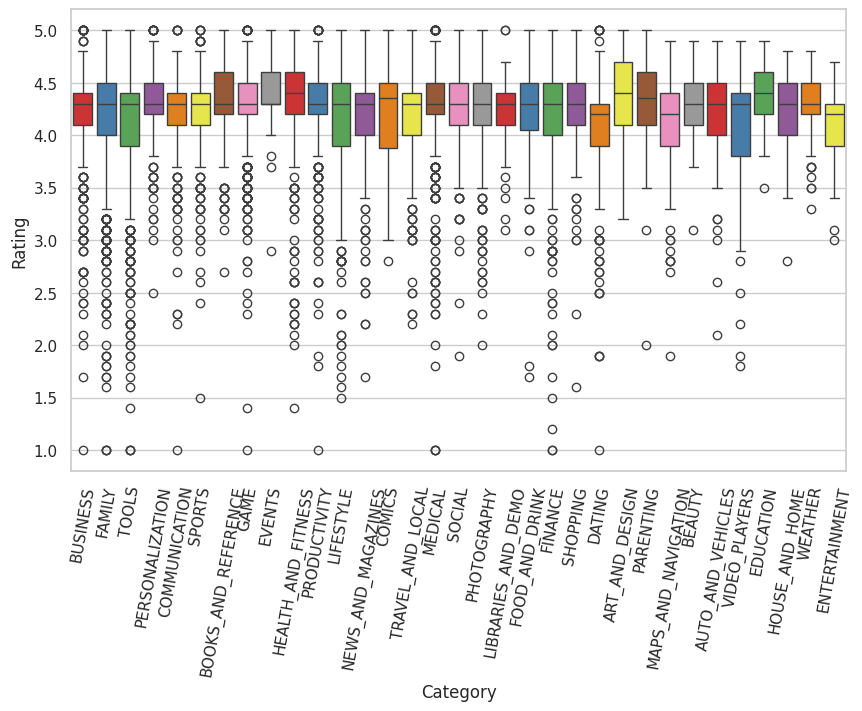

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Rating',x='Category',data = data.sort_values('Rating',ascending=False), palette='Set1')
plt.xticks(rotation=80)

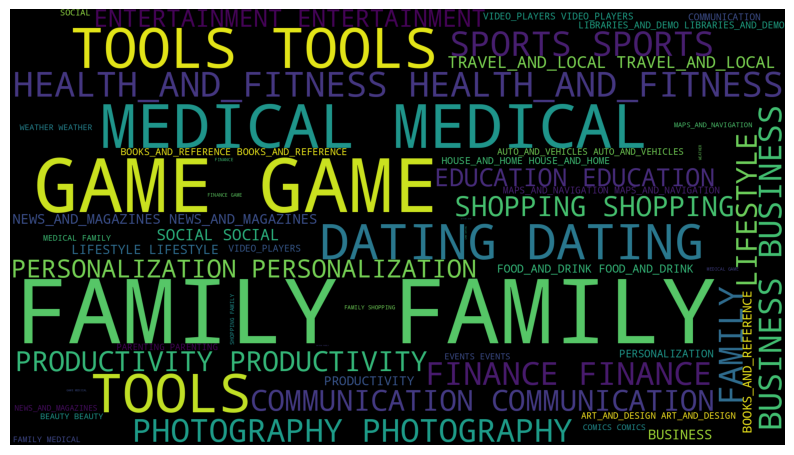

In [28]:
plt.subplots(figsize=(10,6))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<ipython-input-62-37272ab569fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Rating',x='Content Rating',data = data.sort_values('Rating',ascending=False), palette='Set1')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

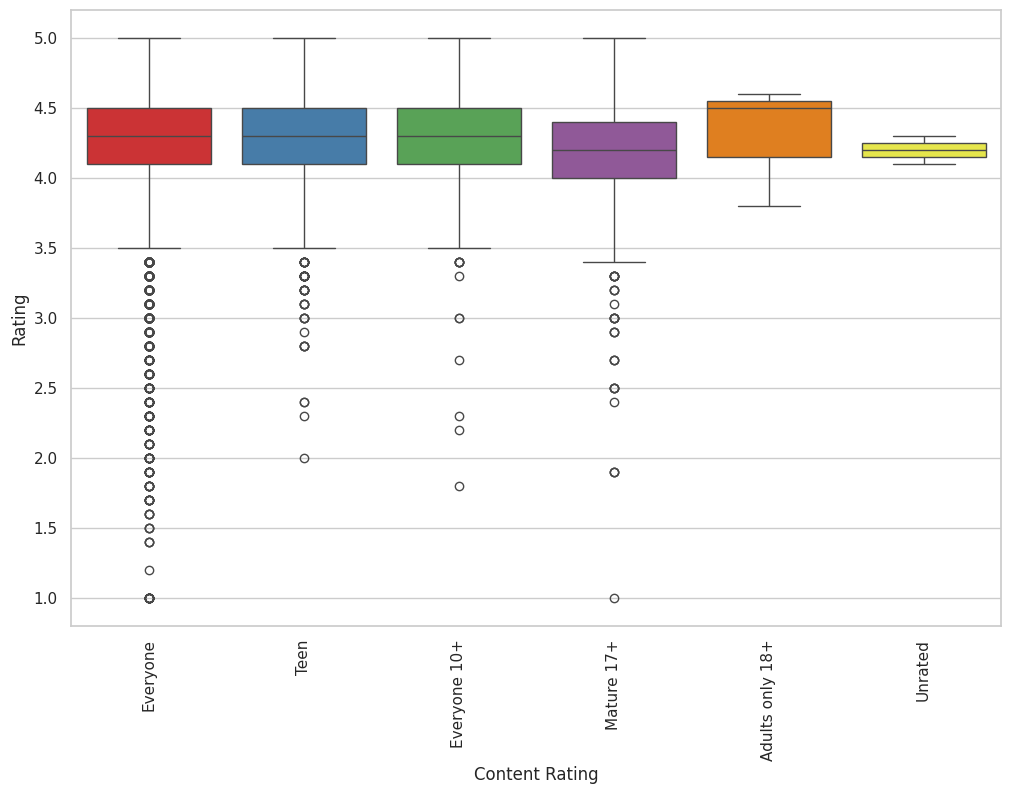

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = data.sort_values('Rating',ascending=False), palette='Set1')
plt.xticks(rotation=90)

<Axes: xlabel='Content Rating', ylabel='Installs'>

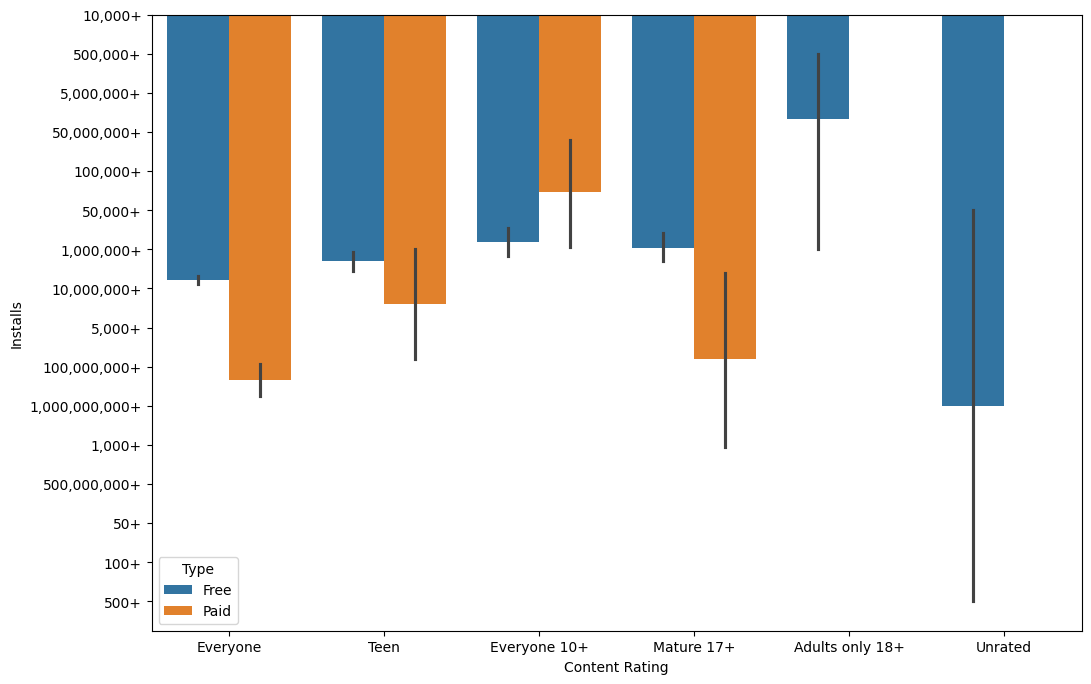

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=data)

In [31]:
data['Genres'].value_counts()

Genres
Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

In [32]:
data['Current Ver'].value_counts()

Current Ver
Varies with device    1467
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

In [33]:
data['Android Ver'].value_counts()

Android Ver
4.1 and up            2453
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [34]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Rating', 'Reviews']

In [35]:
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(data, hue="Type", aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()

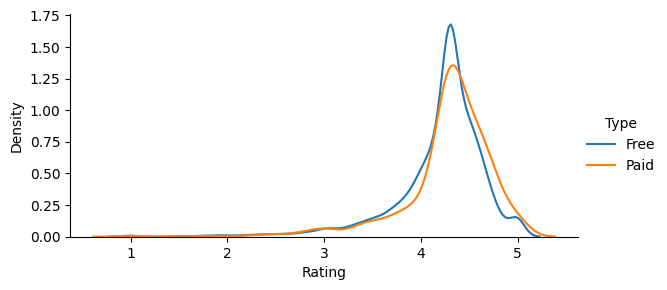

In [36]:
kde_plot('Rating')

There are 274 apps having rating of 5.0


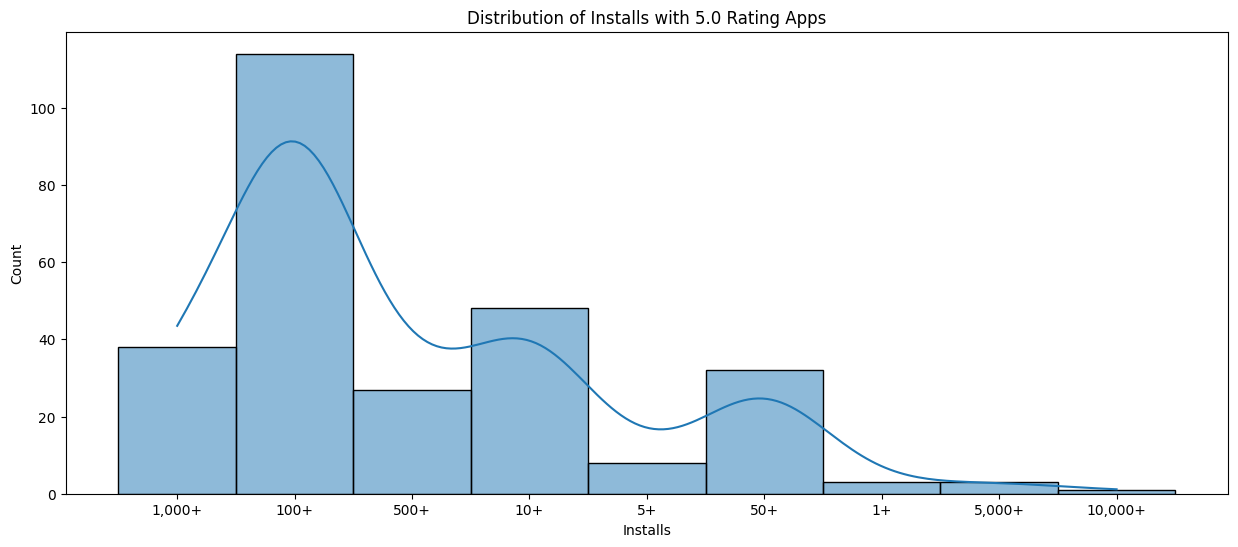

In [37]:
df_rating_5 = data[data.Rating == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')
sns.histplot(data=df_rating_5, x='Installs', kde=True, bins=50)

plt.title('Distribution of Installs with 5.0 Rating Apps')
plt.show()

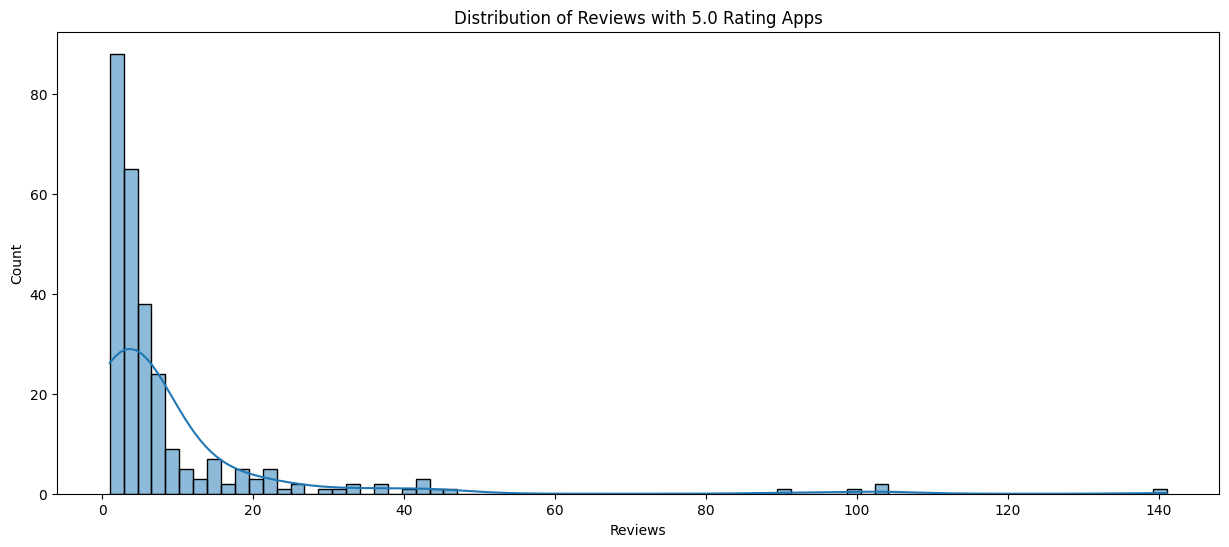

In [38]:
sns.histplot(data=df_rating_5, x='Reviews', kde=True)
plt.title('Distribution of Reviews with 5.0 Rating Apps')
plt.show()

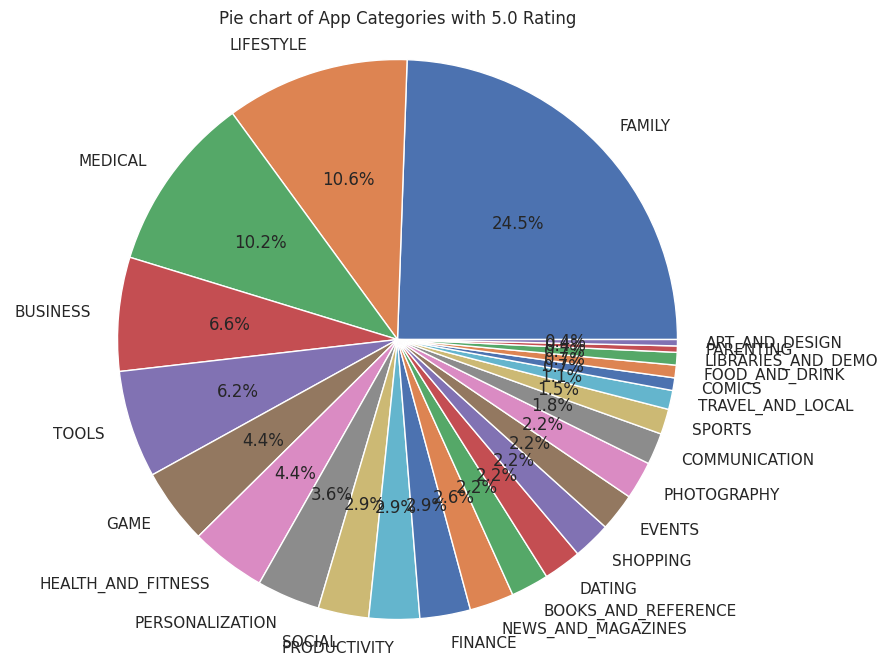

In [64]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()
# Create a pie chart
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
plt.pie(df_rating_5_cat.iloc[:, 1], labels=df_rating_5_cat.iloc[:, 0], autopct='%1.1f%%')
plt.title('Pie chart of App Categories with 5.0 Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

<Figure size 1500x800 with 0 Axes>

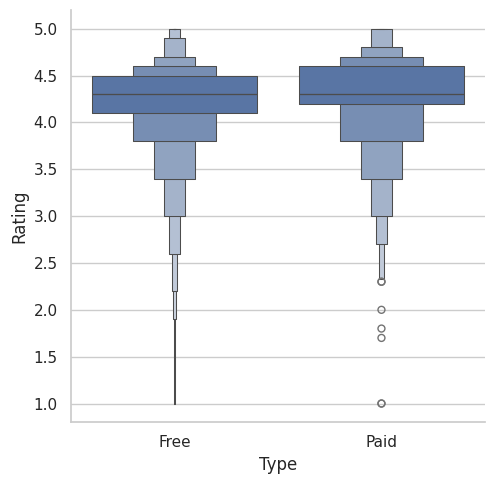

In [42]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = data.sort_values('Rating',ascending=False),kind='boxen')

In [46]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=data, x=col1, y=col2, hue="Type")
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

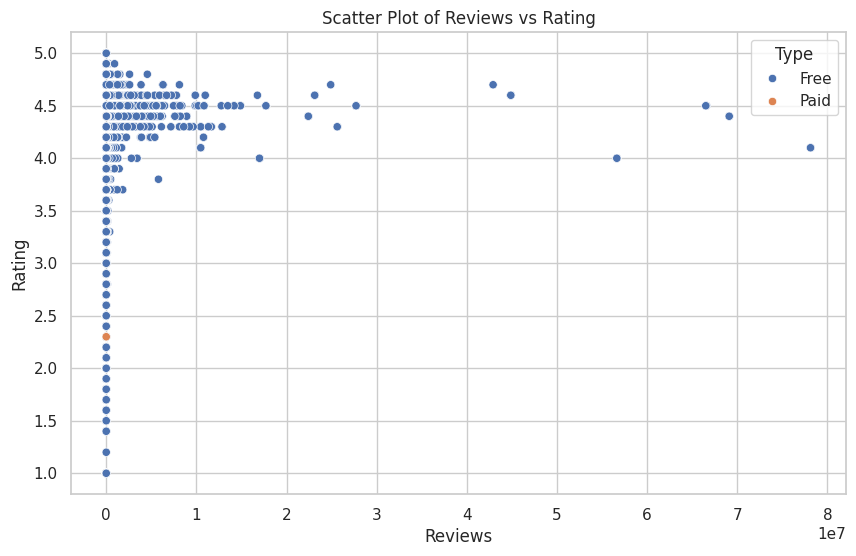

In [48]:
scatters('Reviews', 'Rating')

In [50]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

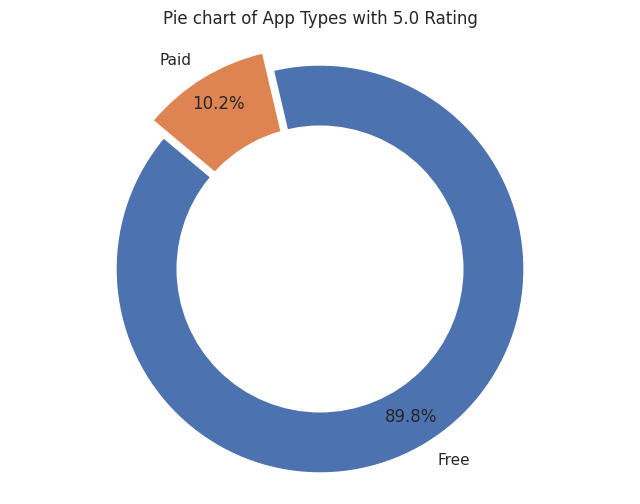

In [51]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Data for the pie chart
sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

# Pull a slice out by exploding it
explode = (0, 0.1)  # Adjust the second value to control the pull-out distance

# Create the pie chart with default colors
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Pie chart of App Types with 5.0 Rating')

# Show the pie chart
plt.show()